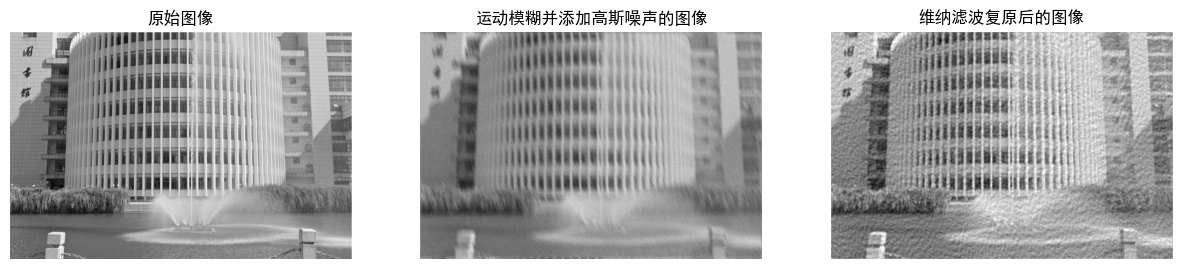

In [11]:
import numpy as np
import cv2
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from skimage import restoration
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图像
I = cv2.imread("D:/picture/school.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = I / 255.0  # 将图像转换为double类型

# 设置运动模糊参数
LEN = 25
THETA = 20

# 创建运动模糊点扩散函数 (PSF)
def motion_blur_psf(length, angle):
    psf = np.zeros((length, length))
    center = length // 2
    tan_theta = np.tan(np.radians(angle))
    for i in range(length):
        offset = int((i - center) * tan_theta + center)
        if 0 <= offset < length:
            psf[i, offset] = 1
    return psf / psf.sum()

PSF = motion_blur_psf(LEN, THETA)

# 对原始图像进行运动模糊
J = convolve2d(I, PSF, mode='same', boundary='wrap')

# 添加高斯噪声
noise_sigma = 0.05
J_noisy = J + noise_sigma * np.random.normal(size=J.shape)

# 设置噪声信噪比 (NSR)
NSR = noise_sigma**2 / np.var(J)

# 使用维纳滤波复原图像
K = restoration.wiener(J_noisy, PSF, NSR)

# 显示结果
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(I, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(132), plt.imshow(J_noisy, cmap='gray')
plt.title('运动模糊并添加高斯噪声的图像')
plt.axis('off')

plt.subplot(133), plt.imshow(K, cmap='gray')
plt.title('维纳滤波复原后的图像')
plt.axis('off')

plt.show()


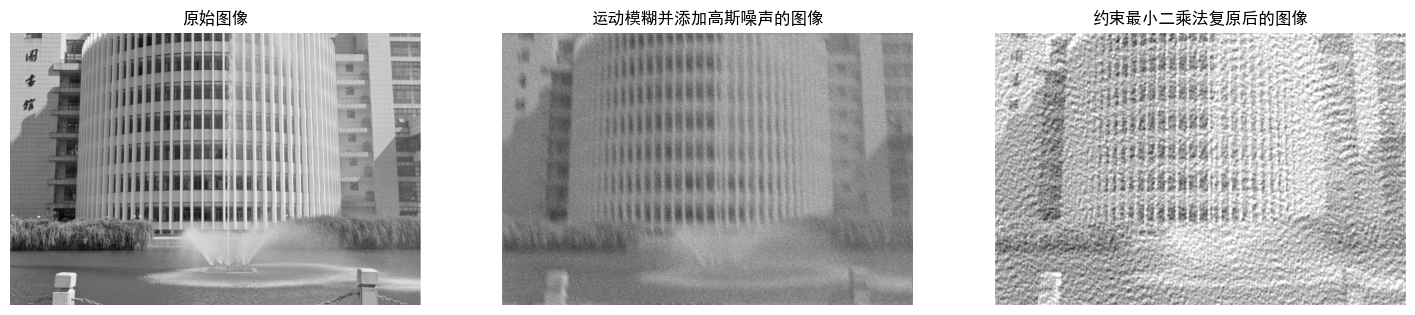

In [15]:
import numpy as np
import cv2
from scipy.signal import convolve2d
from skimage import restoration
import matplotlib.pyplot as plt

# 读取图像并转换为浮点型
I = cv2.imread("D:/picture/school.png", cv2.IMREAD_GRAYSCALE)
I = I / 255.0  # 转换为double类型

# 设置运动模糊参数
LEN = 25  # 模糊长度
THETA = 20  # 模糊角度

# 创建运动模糊的点扩散函数 (PSF)
def motion_blur_psf(length, angle):
    psf = np.zeros((length, length))
    center = length // 2
    tan_theta = np.tan(np.radians(angle))
    for i in range(length):
        offset = int((i - center) * tan_theta + center)
        if 0 <= offset < length:
            psf[i, offset] = 1
    return psf / psf.sum()

PSF = motion_blur_psf(LEN, THETA)

# 对原始图像进行运动模糊
J = convolve2d(I, PSF, mode='same', boundary='wrap')

# 添加高斯噪声
noise_variance = 0.02
J_noisy = J + np.random.normal(0, np.sqrt(noise_variance), J.shape)

# 计算噪声功率
NP = noise_variance * np.prod(I.shape)

# 使用约束最小二乘法复原图像
L = restoration.unsupervised_wiener(J_noisy, PSF)[0]

# 显示结果
plt.figure(figsize=(18, 6))
plt.subplot(131), plt.imshow(I, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(132), plt.imshow(J_noisy, cmap='gray')
plt.title('运动模糊并添加高斯噪声的图像')
plt.axis('off')

plt.subplot(133), plt.imshow(L, cmap='gray')
plt.title('约束最小二乘法复原后的图像')
plt.axis('off')

plt.show()
